In [7]:
import pandas as pd

spotify = pd.read_csv('../data/Spotify dataset export 2025-02-10 09-00-03.csv')

In [8]:
spotify.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube


In [9]:
#Top 100 songs by streams
spotify.sort_values('Stream', ascending=False)['Track'].head(100)


15166                                  Blinding Lights
12385                                     Shape of You
19082                                Someone You Loved
17847                       rockstar (feat. 21 Savage)
17356    Sunflower - Spider-Man: Into the Spider-Verse
                             ...                      
17131                                        Moonlight
569                            Wonderwall - Remastered
19132                                          The Box
13971                               That's What I Like
124                                    Till I Collapse
Name: Track, Length: 100, dtype: object

In [10]:
#remove the youtube most_playedon
spotify = spotify[spotify['most_playedon'] != 'Youtube']

<Axes: xlabel='Stream', ylabel='Tempo'>

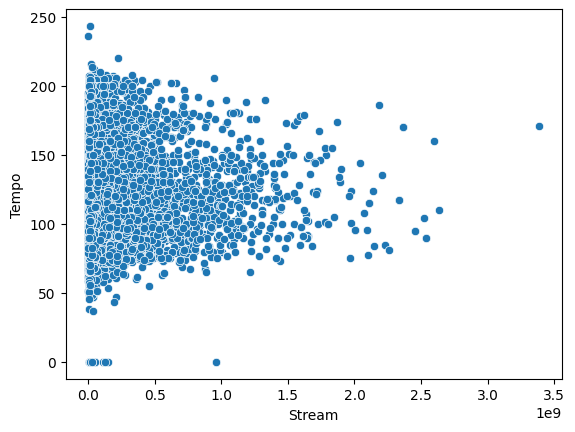

In [11]:
#plot of the tempo by streams
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data=spotify, x='Stream', y='Tempo')

<Axes: xlabel='Stream', ylabel='Danceability'>

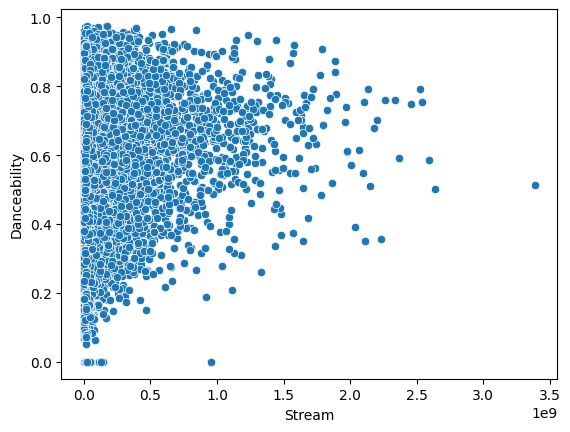

In [12]:
sns.scatterplot(data=spotify, x='Stream', y='Danceability')

<Axes: >

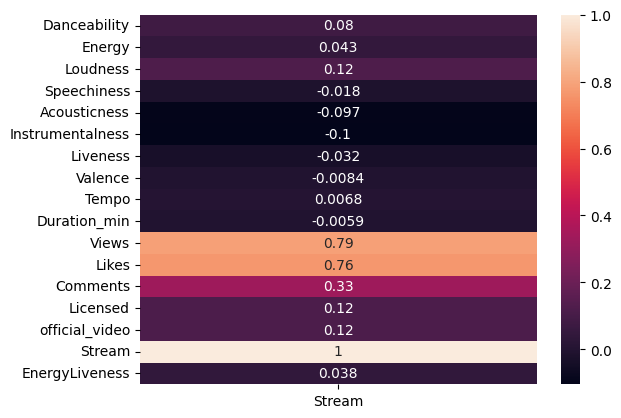

In [13]:

#plot of the correlation matrix
sns.heatmap(spotify.corr(numeric_only=True)['Stream'].to_frame(), annot=True)


In [18]:
import numpy as np
#log transform the stream column
spotify['Stream_log'] = spotify['Stream'].apply(lambda x: np.log(x))


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = spotify.drop(['Stream', 'Artist','Track','Album', 'Title', 'Channel', 'most_playedon','Album_type','Likes','Views','Comments','Stream_log'], axis=1)
Y = spotify['Stream_log']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.18298161136332713

In [41]:
#grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)
grid_search.best_params_
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  19.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  19.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  19.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  20.0s
[CV] END max_depth=10, min_sa

In [43]:
#metrics for the training set
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
Y_train_pred = model.predict(X_train)
mean_squared_error(Y_train, Y_train_pred)
r2_score(Y_train, Y_train_pred)
mean_absolute_error(Y_train, Y_train_pred)

print('Mean squared error: ', mean_squared_error(Y_train, Y_train_pred))
print('R2 score: ', r2_score(Y_train, Y_train_pred))
print('Mean absolute error: ', mean_absolute_error(Y_train, Y_train_pred))


Mean squared error:  0.5338776204126781
R2 score:  0.8021444563494795
Mean absolute error:  0.571253361393286


In [44]:
#R2 score, MAE, MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)
mean_absolute_error(Y_test, Y_pred)
mean_squared_error(Y_test, Y_pred)

print(f'R2 score: {r2_score(Y_test, Y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')

R2 score: 0.18598787053726373
MAE: 1.1250290182297376
MSE: 2.1614095816203025
